In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import pyarrow.feather as feather

In [3]:
table_data = feather.read_table("C:\\Users\\bruno\\Desktop\\Diplomski\\one_df_trta.feather")
edf = table_data.to_pandas()

In [5]:
edf.columns

Index(['EOG LOC-A2', 'EOG ROC-A2', 'EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2',
       'EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EMG Chin',
       'Flow Patient-0', 'Flow Patient-1', 'Effort THO', 'Effort ABD', 'Snore',
       'ECG I', 'SpO2', 'PulseRate', 'Leg 1', 'Leg 2', 'Body', 'Patient'],
      dtype='object')

In [7]:
# For the purpose of this example, let's consider 'SpO2' and 'PulseRate'
features = edf[['SpO2', 'Effort THO', 'Effort ABD', 'PulseRate', 'Snore' ]].copy()

In [8]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [9]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(features_scaled)
principal_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])


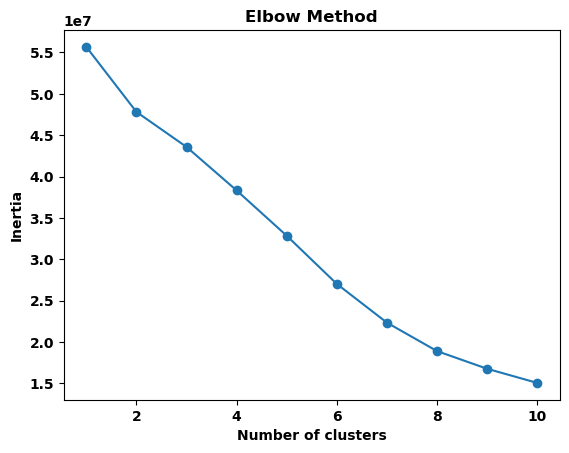

In [11]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=1).fit(principal_df)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
optimal_k = 8  # Example
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=3).fit(principal_df)


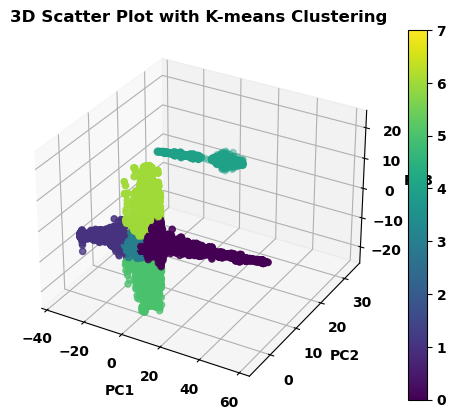

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the points in 3D
sc = ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=kmeans.labels_, cmap='viridis')

# Adding color bar
plt.colorbar(sc)

# Adding labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot with K-means Clustering')

# Show plot
plt.show()

In [ ]:
    silhouette_avg = silhouette_score(principal_df, kmeans.labels_)
    print("For n_clusters =", optimal_k,
          "The average silhouette_score is :", silhouette_avg)
